[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nkeriven/ensta-mt12/blob/main/notebooks/03a_linear_models_ridge/N3_ridge_NIR_biscuits.ipynb)

*Adapted from the following [R notebook](https://github.com/wikistat/Apprentissage/blob/master/NIR/Apprent-R-cookies.ipynb) from [wikistat.fr](http://wikistat.fr/)*

# NIR Biscuits dataset

Prediction in large dimension $d > n$ where the input variables are the discretizations of near infrared (NIR) spectra and the target (responses) the sugar content in a cake dough. 


## Data

This data set contains measurements from quantitative NIR spectroscopy. The example studied arises from an experiment done to test the feasibility of NIR spectroscopy to measure the composition of biscuit dough pieces (formed but unbaked biscuits). Two similar sample sets were made up, with the standard recipe varied to provide a large range for each of the four constituents under investigation: fat, sucrose, dry flour, and water. The calculated percentages of these four ingredients represent the 4 responses. There are 40 samples in the training set (with sample 23 being an outlier) and a further 32 samples in the test set (with example 21 considered as an outlier).
- An NIR reflectance spectrum is available for each dough piece. The spectral data consist of 700 points measured from 1100 to 2498 nanometers (nm) in steps of 2 nm. 
- The last four variables are the responses $y$ which are in order the percentages of _fat_, _sucrose_, _dry flour_, and _water_.

The original data are due to _Osbone et al. (1984)_ and have often been used for method comparison (see e.g. _Krämer et al. 2008_). 
> - B. G. Osborne, T. Fearn, A. R. Miller et S. Douglas (1984). Application of Near Infrared Reflectance spectroscopy to the compositional analysis of biscuits and biscuit doughs, J. Sci. Food Agric. 35, 99–105.
> - Nicole Krämer, Anne Laure Boulesteix et Gerhard Tutz (2008). Penalized Partial Least Squares with applications to B-spline transformations and functional data, Chemometrics and Intelligent Laboratory Systems 94, 60–69.

## Task

An accurate prediction of the cookie composition from the NIR spectra is a lot of interest in industrial applications to save time, and therefore money. The study is restricted to the modelling of sugar levels only, in order to find a better forecasting model. Different regression methods are used and their predictive qualities are compared.


## Exercise

In the following, the questions to answer (exercises) are indicated by a **Q** mark

#### Load the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nkeriven/ensta-mt12/main/notebooks/data/cookie.csv')
print(df.shape)
#Show first lines
df.head(5)

(72, 704)


,1100nm,1102nm,1104nm,1106nm,1108nm,1110nm,1112nm,1114nm,1116nm,1118nm,...,2488nm,2490nm,2492nm,2494nm,2496nm,2498nm,fat%,sucrose%,dry flour%,water%
0,0.249846,0.249745,0.249441,0.249036,0.248885,0.248986,0.249036,0.249239,0.249846,0.250858,...,1.65743,1.65550,1.65515,1.65262,1.65186,1.65156,21.08,13.32,50.09,13.58
1,0.256096,0.256096,0.256353,0.256559,0.256868,0.256868,0.256662,0.256662,0.256920,0.257847,...,1.68695,1.68525,1.68551,1.68612,1.68623,1.68741,18.37,15.65,49.63,14.41
2,0.274770,0.274720,0.274819,0.274770,0.274819,0.274620,0.274819,0.274969,0.275665,0.276511,...,1.62667,1.62493,1.62359,1.62369,1.62264,1.62224,15.35,19.06,48.63,15.04
3,0.243735,0.243735,0.243782,0.243688,0.243453,0.243265,0.243218,0.243312,0.243876,0.244816,...,1.53817,1.53747,1.53770,1.53639,1.53526,1.53521,21.59,19.40,45.57,11.52
4,0.243405,0.243261,0.243261,0.243357,0.243070,0.242927,0.243118,0.243501,0.244074,0.245079,...,1.56693,1.56654,1.56640,1.56573,1.56468,1.56415,17.88,15.35,50.09,14.76


#### Display some summary statistics

In [3]:
df.describe()

,1100nm,1102nm,1104nm,1106nm,1108nm,1110nm,1112nm,1114nm,1116nm,1118nm,...,2488nm,2490nm,2492nm,2494nm,2496nm,2498nm,fat%,sucrose%,dry flour%,water%
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.275404,0.275290,0.275254,0.275271,0.275287,0.275414,0.275560,0.275856,0.276356,0.277207,...,1.805706,1.806000,1.808194,1.809824,1.812639,1.814766,18.309583,16.593750,48.981944,14.191389
std,0.020142,0.020172,0.020230,0.020305,0.020327,0.020428,0.020461,0.020503,0.020506,0.020535,...,0.184266,0.185820,0.187782,0.190756,0.194440,0.197729,1.968346,3.903907,2.732158,1.483348
min,0.243405,0.243261,0.243261,0.243357,0.243070,0.242927,0.243118,0.243312,0.243763,0.244816,...,1.538170,1.537470,1.537700,1.536390,1.535260,1.535210,14.840000,9.950000,43.530000,11.030000
25%,0.260126,0.260083,0.260168,0.260404,0.260633,0.260890,0.261263,0.261758,0.262133,0.263217,...,1.678730,1.676932,1.675780,1.676313,1.675595,1.673728,16.590000,13.320000,46.360000,13.395000
50%,0.274366,0.274372,0.274485,0.274575,0.274639,0.274660,0.274784,0.274809,0.275193,0.275969,...,1.733820,1.732420,1.733845,1.735730,1.738265,1.738690,18.380000,16.570000,49.375000,14.280000
75%,0.287304,0.287115,0.287214,0.287343,0.287401,0.287498,0.287522,0.287843,0.288434,0.289255,...,1.932130,1.931243,1.936948,1.939532,1.944662,1.950438,19.942500,19.882500,50.770000,15.072500
max,0.356348,0.356295,0.356712,0.357181,0.357181,0.357806,0.358015,0.358432,0.358901,0.359943,...,2.451230,2.459570,2.452300,2.475940,2.492770,2.507160,21.670000,23.190000,54.610000,17.690000


#### Format the input/target data set

In [4]:
# Training test is composed of the first 40 samples:
# input are the NIR spectra along the 700 wavelength (1100nm to 2498nm)
Xtrain = df.iloc[:40, :700].to_numpy()
# target is the 'sucrose' variable
Ytrain = df.iloc[:40, 701].to_numpy()
# Test test is composed of the last 32 samples:
Xtest = df.iloc[40:, :700].to_numpy()
Ytest = df.iloc[40:, 701].to_numpy()
print('Xtrain shape: {}, Ytrain shape: {}'.format(Xtrain.shape, Ytrain.shape))
print('Xtest  shape: {}, Ytest  shape: {}'.format(Xtest.shape, Ytest.shape))


Xtrain shape: (40, 700), Ytrain shape: (40,)
Xtest  shape: (32, 700), Ytest  shape: (32,)


#### Display the training set
For each training sample $i=1\ldots 40$, plot the spectrum $X_i \in \mathbb{R}^{700}$ with a specific color depending on the targetted sugar content $y_i$ 

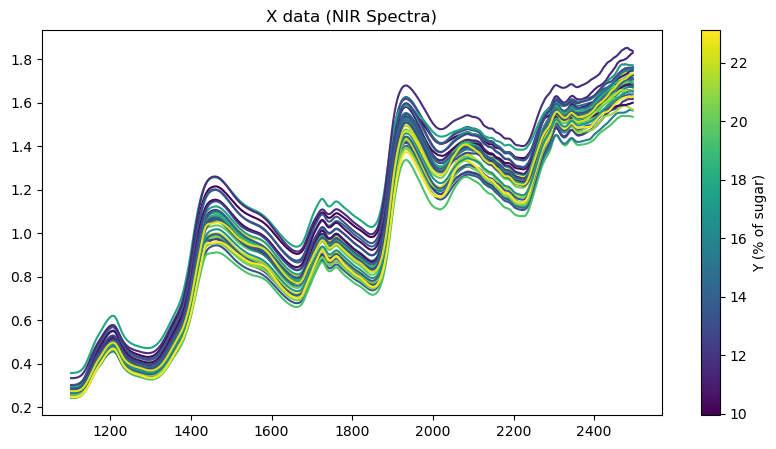

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def multiline(data, y_color, x_axis=None,  ax=None, **kwargs):
    # find axes
    ax = plt.gca() if ax is None else ax
    # create LineCollection
    x_axis = np.arange(data.shape[1]) if x_axis is None else x_axis
    segments = [np.column_stack([x_axis, x]) for x in data]
    lc = LineCollection(segments, **kwargs)
    # set coloring of line segments
    lc.set_array( np.asarray(y_color) )
    # add lines to axes and rescale 
    ax.add_collection(lc)
    ax.autoscale()
    return lc

fig, ax = plt.subplots(figsize=(10,5))
wavelengths = np.linspace(1100,2498,700) # nanometers
lc = multiline(Xtrain,  Ytrain,  x_axis=wavelengths, ax=ax)
ax.set_title('X data (NIR Spectra)')
axcb = fig.colorbar(lc)
axcb.set_label('Y (% of sugar)')
plt.show()

**Q** : What do you think about the smoothness of these spectra and the possible correlation between the input variables for the considered wavelength discretization

**Q** : By visual inspection, is there a relationship between NIR spectra (input variables) and sugar content (target)?

## Linear Regression

In [6]:
# function to display residuals (responses used as global variables)
def plot_residuals(ax, msg):
    ax.plot(Ytrain-Ytrain_hat,'s',label='train')
    ax.plot(Ytest-Ytest_hat,'o',label='test')
    ax.legend()
    ax.set_xlabel('sample index')
    ax.set_title(msg+ ' residuals')
    ax.grid('On')

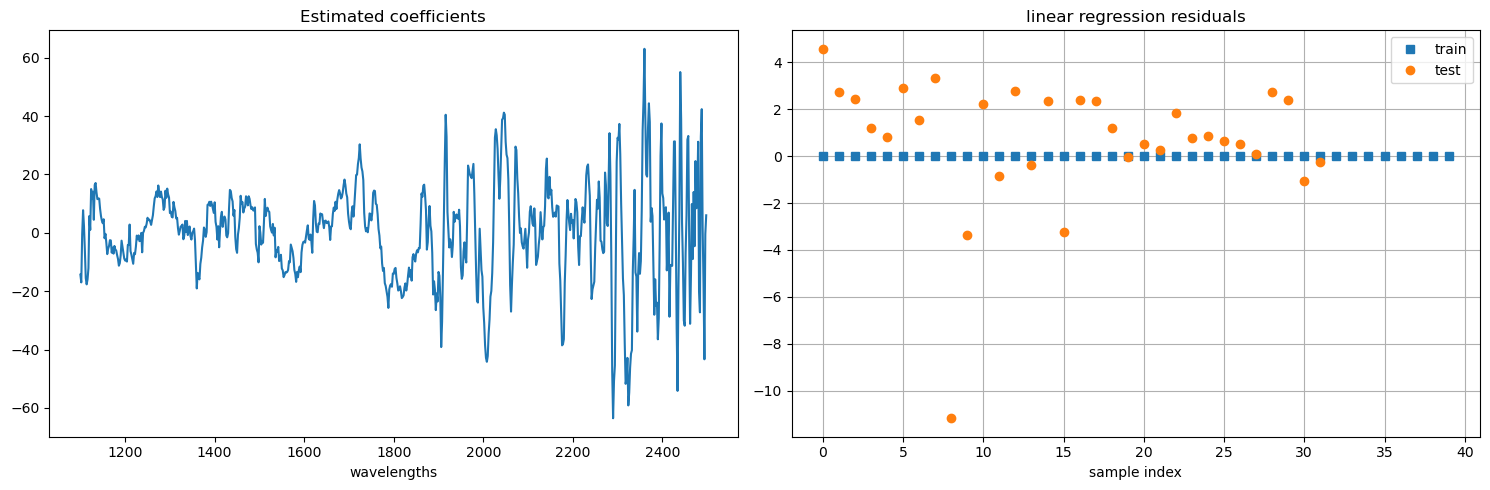

In [7]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# fit a linear model with ordinary least squares estimate
linreg = LinearRegression()
linreg.fit(Xtrain, Ytrain)
# make Prediction 
Ytrain_hat =  linreg.predict(Xtrain)
Ytest_hat =  linreg.predict(Xtest)
# plot the coeff
_, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(wavelengths,linreg.coef_)
axes[0].set_xlabel('wavelengths')
axes[0].set_title('Estimated coefficients')
# plot the residuals
plot_residuals(axes[1], 'linear regression')
plt.tight_layout()

- **Q**: How can we explain that the residuals are all zero on the training set?
- **Q**: What are the properties of the returned regressor? Hint: see https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
- **Q**: Do you think that linear regression fit with ordinary least squares estimation is suitable here (explain why)?

### Compute the prediction *score*

The usual squared $\ell_2$ loss, which yields the _mean squared error_, depends on the scale of the response $y$ which is dataset dependent and/or can be arbitrarily scaled. Thus to appreciate the performance of the prediction, it may be more meaningful to consider a normalized measure such that the __coefficient of determination__, usually denoted as $R^2$.

This represents the proportion of variance (of y) that has been explained by the model prediction:
Best possible score (the higher, the better)  is $1$ and it can be negative (because the model can be arbitrarily worse). A (trivial) constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.


If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value for $i=1,\ldots,n$, the estimated (biased) $R^2$ is defined as:
$$
R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
where
$\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$
is the sample mean of the responses,
$\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$
is the residual sum of squares (mean squared error estimate), and 
$\sum_{i=1}^{n} (y_i - \bar{y})^2$ 
is the (unnormalized) sample variance of the responses, called the _total variance_.

When it is estimated based on **Test data**, this provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

In [8]:
from sklearn.metrics import r2_score
print('Linear regression : R^2 is {:6.4f}'.format(r2_score(Ytest,Ytest_hat)))

Linear regression : R^2 is 0.4734


**Q**: What strategies can be investigated to improve the performances?

## Principal component regression (PCR)

In order to reduce the dimension of the problem and to prevent the curse of dimensionality, one simple strategy is to used as regressors the principal components (PCA procedure) of the input variables. Principal component regression (PCR) typically uses only a subset of all the principal components for regression, making PCR a kind of _regularized procedure_.
With scikit-learn pipelines, this is super easy to link the two procedures to make PCR.

**Q**: Why PCR procedure may allows one to mitigate overfitting?

In [15]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Define the PCR prediction procedure as a pipeline of pca + linear regression steps
# Also remember that scale matters for PCA (and more generally for regularized procedure)!
pcr = Pipeline( [('scaler', StandardScaler()), ('pca', PCA()), ('linreg', LinearRegression())] )

**Q**: What are the hyperparameters to be optimized for PCR?

CV estimated PCR hyperparameters: {'pca__n_components': 7}


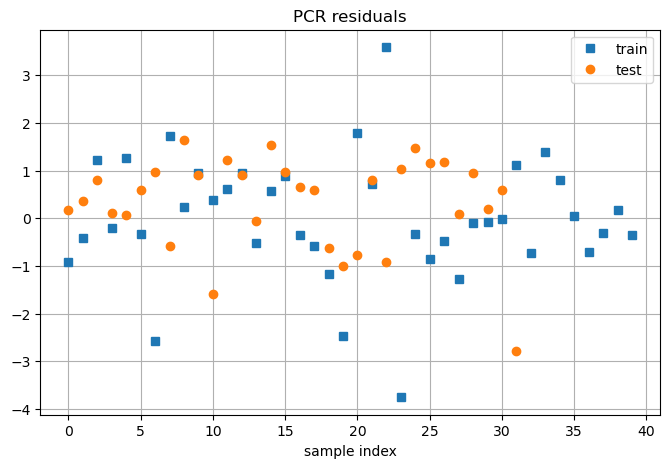

In [14]:
# Define the cross-validation procedure
pcrCV = GridSearchCV(pcr, {'pca__n_components': list(range(1, 10)) + [10,20] }, n_jobs=1, cv=10)
pcrCV.fit(Xtrain,Ytrain)
# make Predistion 
Ytrain_hat =  pcrCV.predict(Xtrain)
Ytest_hat =  pcrCV.predict(Xtest)
# plot the residuals
fig, ax = plt.subplots(figsize=(8,5))
plot_residuals(ax, 'PCR')
# display best cross-validated hyperparameters
print('CV estimated PCR hyperparameters: {}'.format(pcrCV.best_params_))

In [17]:
# Compute R2 score
print('Principal component regression: R^2 is {:6.4f}'.format(r2_score(Ytest,Ytest_hat)))

Principal component regression: R^2 is 0.9311


- **Q**: what is the dimension reduction ratio with respect to (full) linear regression?
- **Q**: why the number of principal components to be considered can not exceed here $36$ for the $K=10$ fold cross-validated PCR?
- **Q**: Does it worth to use here PCR rather than linear regression?

## Ridge Regression

In order to regularize the linear regression procedure, we  consider now a ridge penalization. With scikit-learn, we can directly use `RidgeCV` to perform
Ridge regression with built-in cross-validation.

**Q**: Why ridge regression is referred to as a *shrinkage* procedure?

CV estimated ridge regularization coeff alpha: 0.0452


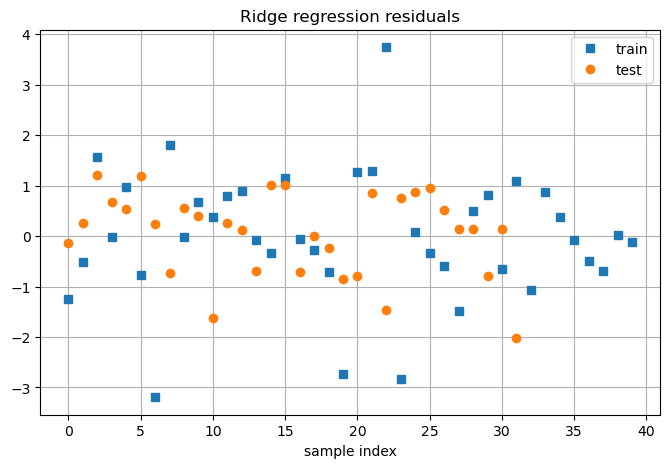

In [18]:
# set possible values for the regularization coefficient 
# (denoted as \lambda in the slides or alpha in the sklearn API)
alphas = np.logspace(-4, -0.5, 30)
ridge = RidgeCV(alphas=alphas, cv=10)
# make predistion 
ridge.fit(Xtrain,Ytrain)
Ytrain_hat =  ridge.predict(Xtrain)
Ytest_hat = ridge.predict(Xtest)
# plot the residuals
fig, ax = plt.subplots(figsize=(8,5))
plot_residuals(ax, 'Ridge regression')
# display best cross-validated hyperparameters 
print('CV estimated ridge regularization coeff alpha: {:6.4f}'.format(ridge.alpha_))

In [19]:
# Compute R2 score
print('Ridge regression: R^2 is {:6.4f}'.format(r2_score(Ytest,Ytest_hat)))

Ridge regression: R^2 is 0.9544


- **Q**: Based on all these results, is there valuable information in NIR spectra to predict sucrose content? What is the standard error magnitude for predicting the percentage of sucrose?
- **Q**: *Optional:* Redo the same analysis now for the `dry flour` response variable . Do you find the same results and conclusions?

### Cross-validation curves
Display cross-validation curves to select the optimal regularization parameter. Note that this requires now to use `Ridge`+ `GridSearchCV` sklearn methods (rather than the direct`RidgeCV`) to have access to the $K$ fold cross valiation results.


Ridge regression: R^2 is 0.9583


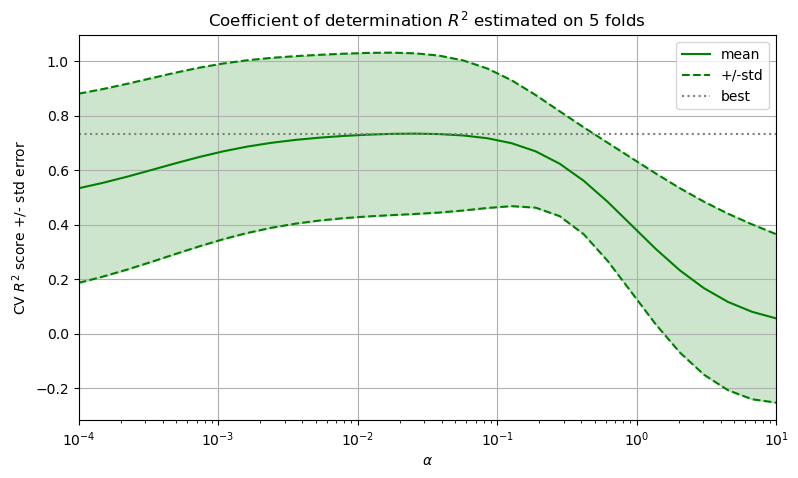

In [20]:
# make GridSearchCV
from sklearn.model_selection import KFold
ridge = Ridge()
cv = KFold(n_splits=5, shuffle=False, random_state=None)
model = GridSearchCV(ridge, {'alpha': np.logspace(-4, 1, 30) }, cv=cv, scoring='r2')
model.fit(Xtrain,Ytrain)

# Display results
fig, ax = plt.subplots(figsize=(9,5))
alphas = np.asarray( model.cv_results_['param_alpha'], dtype=float)
scores = model.cv_results_['mean_test_score']
std_error = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores , 'g-',label='mean')
ax.grid()
ax.semilogx(alphas, scores + std_error, 'g--')
ax.semilogx(alphas, scores - std_error, 'g--', label='+/-std')
ax.fill_between(alphas, scores - std_error, scores + std_error, 
                alpha=0.2, color="g")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'CV $R^2$ score +/- std error')
ax.set_title(r'Coefficient of determination $R^2$ estimated on {} folds'.format(cv.n_splits))
ax.axhline(np.max(scores), linestyle=':', color='.5', label='best')
ax.legend()
ax.axis('tight')
ax.set_xlim([alphas[0], alphas[-1]])
Ytest_hat = model.predict(Xtest)
print('Ridge regression: R^2 is {:6.4f}'.format(r2_score(Ytest,Ytest_hat)))

- **Q**: How confident are you in the estimation of the $R^2$ score by cross-validation?
- **Q**: How confident are you in the estimation of the best regularization coefficient alpha by cross-validation (*hint:* randomize the CV folds by setting `shuffle=True` and changing the `random_state`) ?

### (*Optional*) Leave-one-out Cross Validation (LOOCV)

Remember that Leave-one-out cross-validation (LOOCV) takes only *one left-out sample* as the validation set and the remaining observations as the training set. This is repeated until each sample is left-out.


Using some algebra tricks, LOOCV can be computed very efficiently (in fact, essentially *for free*) for ridge regression models as explained in
> Rifkin M. Ryan, and Ross A. Lippert. ["Notes on regularized least squares," (2007)](http://128.30.100.62:8080/media/fb/ps/MIT-CSAIL-TR-2007-025.pdf), MIT-CSAIL Technical Report, 

Note also that there exist a famous variant of LOOCV based on a rotation of the original regression problem (called generalized cross validation): 
> Golub G., Heath M., and Wahba G., ["Generalized Cross-Validation as a Method for Choosing a Good Ridge Parameter," (1979)](http://pages.stat.wisc.edu/~wahba/stat860public/pdf1/golub.heath.wahba.pdf), TECHNOMETRICS, Vol 21, No 2

which appears to be quite useful on many real-word datasets.

*LOO is the default internal procedure for sklearn `RidgeCV` method (when `cv`parameter is None)*.

In [ ]:
# Use LOOCV (default setting)
alphas = np.logspace(-5, 0.5, 100)
ridge = RidgeCV(alphas=alphas)

- **Q**: What are the best regularization coefficient $\alpha$ and the estimated $R^2$  for LOOCV on this dataset?
- **Q**: Comparing with the performance obtained on the test set (and with the previous $K$-fold CV), is LOO worthy here? How can we explain this result?